# 중심차분

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def numerical_diff(f,x):
    h=1e-4
    return((f(x+h)-f(x-h))/(2*h))

In [7]:
def function1(x):
    return 0.01*x**2+0.1*x

$f(x)=0.01x^2+0.1x$

In [8]:
x=np.arange(0.0,20.0,0.1)

In [9]:
y=function1(x)

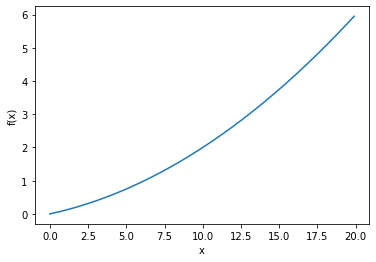

In [10]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)

In [11]:
numerical_diff(function1,5)

0.1999999999990898

In [12]:
numerical_diff(function1,10)

0.2999999999986347

## 편미분

In [13]:
def function2(x):
    return x[0]**2 + x[1]**2

$f(x)=x_0^2+x_1^2$   
$\frac{dy}{dx_0}=2x_0$  
$\frac{dy}{dx_1}=2x_1$

In [14]:
# x[0]=3, x[1]=4
def function_tmp(x0):
    return x0**2+4**2

In [15]:
numerical_diff(function_tmp,3)

6.00000000000378

In [16]:
def function_tmp2(x1):
    return 3**2+x1**2

In [17]:
numerical_diff(function_tmp2,4)

7.999999999999119

# 기울기

In [18]:
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x) # x 크기만큼의 0으로 채워진 배열

    for idx in range(x.size):
        tmp=x[idx] # tmp=3.0
        x[idx]=tmp+h # x[0]=3+h
        fhx1=f(x) # x=[3+h,4]

        x[idx]=tmp-h
        fhx2=f(x) # x=[3-h,4]

        grad[idx]=(fhx1-fhx2)/(2*h)
        x[idx]=tmp
    return grad

In [19]:
x=np.array([3.0,4.0])
numerical_gradient(function2,x)

array([6., 8.])

In [20]:
x=np.array([0.0,2.0])
numerical_gradient(function2,x)

array([0., 4.])

# 경사하강

In [21]:
def gradient_descent(f,init_x,lr,step_num):
    x=init_x.copy()

    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
    
    return x

In [22]:
init_x=np.array([-3.0,4.0])
gradient_descent(function2,init_x=init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [23]:
gradient_descent(function2,init_x=init_x,lr=10.0,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [24]:
gradient_descent(function2,init_x=init_x,lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

---  

In [25]:
def CEE(y,t):
    # y:예측값, t:정답값
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

In [26]:
def softmax(x):
    c=np.max(x)
    exp_x=np.exp(x-c)
    sum_exp_x=np.sum(exp_x)
    y=exp_x/sum_exp_x

    return y

In [27]:
class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3) # 2x3 랜덤 배열 생성(W값)
    
    # y_pred=Wx (절편b는 편의상 생략)
    def predict(self,x):
        return np.dot(x,self.W)
        # x: 3x1, W: 2x3 
    
    # 손실함수
    def loss(self,x,t):
        z=self.predict(x)
        y=softmax(z) # 활성화함수 : 확률값으로 변환
        loss=CEE(y,t) # 손실함수 : CEE(predict,true)
        return loss

In [28]:
net=simpleNet()

In [29]:
net.W

array([[ 0.49121592, -2.0810945 , -1.92744501],
       [-0.17890384,  1.52120173, -1.24228683]])

In [30]:
x=np.array([0.6,0.9])
y_pred=net.predict(x)

In [31]:
y_pred

array([ 0.1337161 ,  0.12042486, -2.27452515])

In [32]:
np.argmax(y_pred)

0

In [33]:
y_true=np.array([1,0,0])

In [34]:
net.loss(x,y_true)

0.7308136418958902

In [35]:
def f(_):
    return net.loss(x,y_true)

In [36]:
f(3),f(4)

(0.7308136418958902, 0.7308136418958902)

In [37]:
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)

    for idx,_ in np.ndenumerate(x):
        tmp=x[idx] 
        x[idx]=tmp+h 
        fhx1=f(x) 

        x[idx]=tmp-h
        fhx2=f(x) 

        grad[idx]=(fhx1-fhx2)/(2*h)
        x[idx]=tmp
    return grad

In [38]:
# np.ndenumerate 참고
for indx,value in np.ndenumerate(net.W):
    print(indx, value)

(0, 0) 0.4912159190106779
(0, 1) -2.081094496255103
(0, 2) -1.9274450093348539
(1, 0) -0.17890383570133236
(1, 1) 1.5212017346949605
(1, 2) -1.2422868316912175


In [39]:
net.W # 초기값

array([[ 0.49121592, -2.0810945 , -1.92744501],
       [-0.17890384,  1.52120173, -1.24228683]])

In [40]:
numerical_gradient(f,net.W) # 손실함수의 기울기

array([[-0.31108977,  0.28509554,  0.02599422],
       [-0.46663465,  0.42764331,  0.03899134]])